# **Principal Component Analysis**

In [ ]:
!pip install opencv-python
import cv2
import os
import numpy as np
import zipfile
import matplotlib.pyplot as plt
files ="/content/"
# print(os.listdir(files))

In [ ]:
with zipfile.ZipFile("/content/archive.zip") as facezip:
    print(facezip.namelist())


['README', 's1/1.pgm', 's1/10.pgm', 's1/2.pgm', 's1/3.pgm', 's1/4.pgm', 's1/5.pgm', 's1/6.pgm', 's1/7.pgm', 's1/8.pgm', 's1/9.pgm', 's10/1.pgm', 's10/10.pgm', 's10/2.pgm', 's10/3.pgm', 's10/4.pgm', 's10/5.pgm', 's10/6.pgm', 's10/7.pgm', 's10/8.pgm', 's10/9.pgm', 's11/1.pgm', 's11/10.pgm', 's11/2.pgm', 's11/3.pgm', 's11/4.pgm', 's11/5.pgm', 's11/6.pgm', 's11/7.pgm', 's11/8.pgm', 's11/9.pgm', 's12/1.pgm', 's12/10.pgm', 's12/2.pgm', 's12/3.pgm', 's12/4.pgm', 's12/5.pgm', 's12/6.pgm', 's12/7.pgm', 's12/8.pgm', 's12/9.pgm', 's13/1.pgm', 's13/10.pgm', 's13/2.pgm', 's13/3.pgm', 's13/4.pgm', 's13/5.pgm', 's13/6.pgm', 's13/7.pgm', 's13/8.pgm', 's13/9.pgm', 's14/1.pgm', 's14/10.pgm', 's14/2.pgm', 's14/3.pgm', 's14/4.pgm', 's14/5.pgm', 's14/6.pgm', 's14/7.pgm', 's14/8.pgm', 's14/9.pgm', 's15/1.pgm', 's15/10.pgm', 's15/2.pgm', 's15/3.pgm', 's15/4.pgm', 's15/5.pgm', 's15/6.pgm', 's15/7.pgm', 's15/8.pgm', 's15/9.pgm', 's16/1.pgm', 's16/10.pgm', 's16/2.pgm', 's16/3.pgm', 's16/4.pgm', 's16/5.pgm', 's1

[[138 135 135 ... 128 129 126]
 [136 135 136 ... 130 128 126]
 [134 135 134 ... 132 128 128]
 ...
 [ 43  26  28 ...  14  22  22]
 [ 37  27  26 ...  16  23  25]
 [ 39  27  26 ...  23  18  35]]
(112, 92)
(112, 92, 3)
[138 138 138]


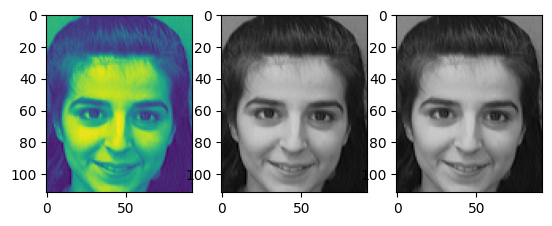

In [73]:
faces = {}
with zipfile.ZipFile("/content/archive.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE) #np.uint8 - 0 to 255 values
print(faces['s10/2.pgm'])
img = faces['s10/2.pgm']
fig,ax =plt.subplots(1,3)
ax[0].imshow(img) #opencv reads the image channels as BGR
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
ax[1].imshow(backtorgb[:,:,::-1])
ax[2].imshow(backtorgb)
faceshape=img.shape
print(faceshape)
print(backtorgb.shape)
print(backtorgb[0,0,:])
plt.show()

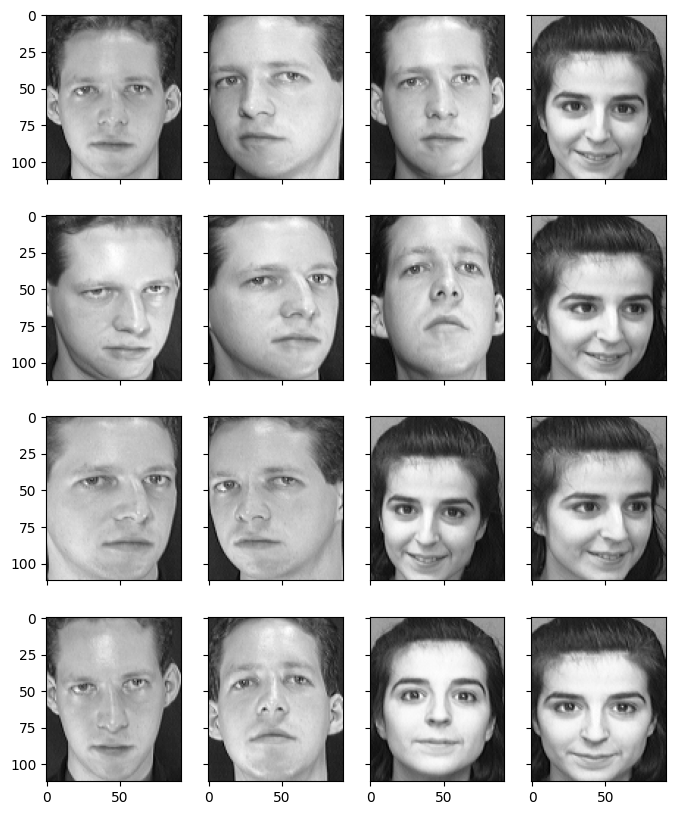

In [ ]:
imgs=list(faces.values())[:-16]
fig,ax=plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(0,16):
    ax[i%4][i//4].imshow(imgs[i],cmap="gray")
plt.show()

In [ ]:
n_classes= set(i.split("/")[0] for i in list(faces.keys()))
print("CLASSES",len(n_classes))
print("TOTAL",len(faces))

CLASSES 40
TOTAL 400


In [63]:
# Take classes 1-39 for eigenfaces, keep entire class 40 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40/"):
        continue # this is our test set
    if key == "s39/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

# Create facematrix as (n_samples,n_pixels) matrix
facematrix = np.array(facematrix)
print(len(facematrix))

389


In [79]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(facematrix)
print(pca.explained_variance_ratio_)

[1.77824822e-01 1.29057925e-01 6.67093882e-02 5.63561346e-02
 5.13040312e-02 3.39156477e-02 2.47893586e-02 2.27967054e-02
 1.95632067e-02 1.82678428e-02 1.45655853e-02 1.38626271e-02
 1.13318896e-02 1.07267786e-02 9.68365599e-03 9.17860717e-03
 8.60995215e-03 8.21053028e-03 7.36580634e-03 7.01112888e-03
 6.69450840e-03 6.40327943e-03 5.98295099e-03 5.49298705e-03
 5.36083980e-03 4.99408106e-03 4.84854321e-03 4.77687371e-03
 4.50099203e-03 4.35061143e-03 4.27684434e-03 4.05463914e-03
 3.96785012e-03 3.83241704e-03 3.69966355e-03 3.56356652e-03
 3.41269732e-03 3.33215240e-03 3.17642634e-03 3.03400142e-03
 2.97464206e-03 2.91054493e-03 2.86082016e-03 2.78052126e-03
 2.69873388e-03 2.60122139e-03 2.56106677e-03 2.50435737e-03
 2.44154438e-03 2.35425118e-03 2.31772334e-03 2.20335201e-03
 2.18249599e-03 2.16369451e-03 2.11113501e-03 2.05410950e-03
 2.00521036e-03 1.97423272e-03 1.95619744e-03 1.92361114e-03
 1.88146543e-03 1.81655157e-03 1.74212750e-03 1.70581678e-03
 1.66405571e-03 1.635671

In [71]:
print(pca.components_)
pca2=PCA()
pca2.fit_transform(facematrix)
print(pca2.components_)
print(pca2.components_==pca.components_)
print(pca.components_.shape)

[[-0.0031385  -0.00311511 -0.00314579 ... -0.00669021 -0.00603985
  -0.0070422 ]
 [ 0.01397458  0.01391675  0.01393117 ... -0.01147549 -0.0105211
  -0.00969744]
 [ 0.01949678  0.01966094  0.01940504 ...  0.01571058  0.01589665
   0.01636496]
 ...
 [-0.00544915 -0.00102731  0.00406641 ... -0.00261594  0.00191193
  -0.01942036]
 [-0.00256529  0.00251622 -0.00068547 ... -0.01091075 -0.01200536
  -0.01137104]
 [-0.03898893 -0.03977925 -0.00628249 ... -0.00489986 -0.00374962
   0.00092624]]
[[-0.0031385  -0.00311511 -0.00314579 ... -0.00669021 -0.00603985
  -0.0070422 ]
 [ 0.01397458  0.01391675  0.01393117 ... -0.01147549 -0.0105211
  -0.00969744]
 [ 0.01949678  0.01966094  0.01940504 ...  0.01571058  0.01589665
   0.01636496]
 ...
 [-0.00544915 -0.00102731  0.00406641 ... -0.00261594  0.00191193
  -0.01942036]
 [-0.00256529  0.00251622 -0.00068547 ... -0.01091075 -0.01200536
  -0.01137104]
 [-0.03898893 -0.03977925 -0.00628249 ... -0.00489986 -0.00374962
   0.00092624]]
[[ True  True  Tru

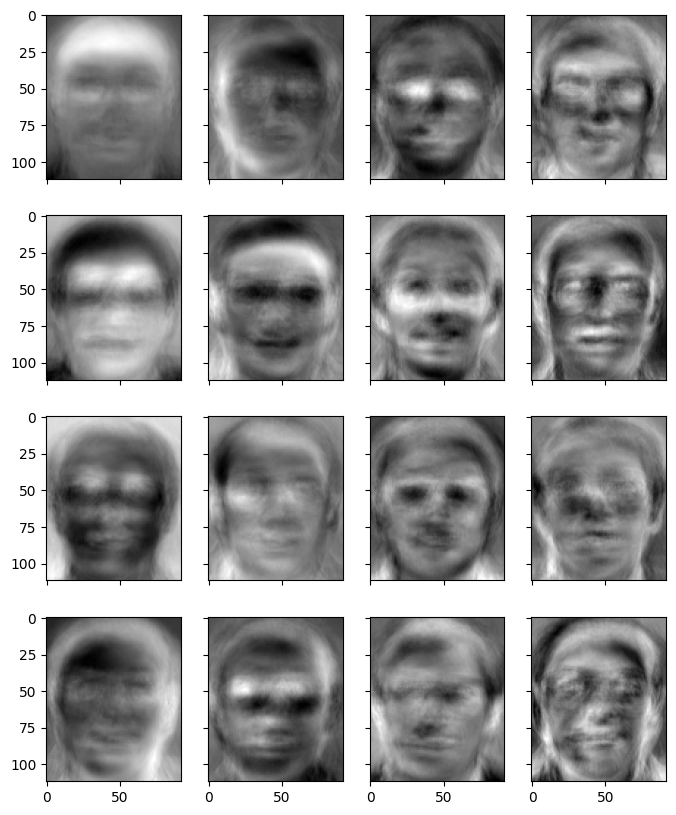

In [74]:
n_components = 50
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()

In [86]:
weights = eigenfaces @ (facematrix - pca.mean_).T
print("weights",weights.shape)
print("eigenfaces",eigenfaces.shape)
print("facematrix",facematrix.shape)
print("pca.mean",pca.mean_.shape)

weights (50, 389)
eigenfaces (50, 10304)
facematrix (389, 10304)
pca.mean (10304,)


query (1, 10304)
query_weigh (50, 1)
(389,)
Best match s39 with Euclidean distance 1559.997137


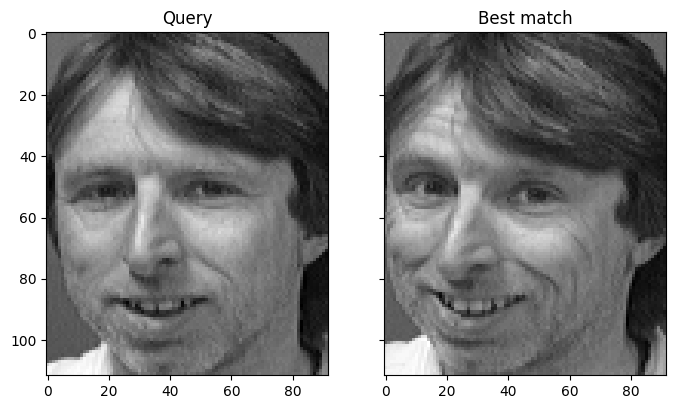

In [92]:
query = faces["s39/10.pgm"].reshape(1,-1)
print("query",query.shape)
query_weight = eigenfaces @ (query - pca.mean_).T
print("query_weigh",query_weight.shape)
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print(euclidean_distance.shape)
# print(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

Best match s5 with Euclidean distance 2690.209330


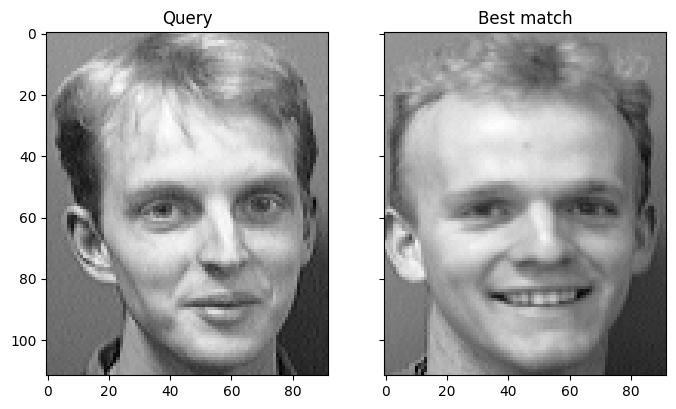

In [93]:
#testing on 40th class
query = faces["s40/1.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

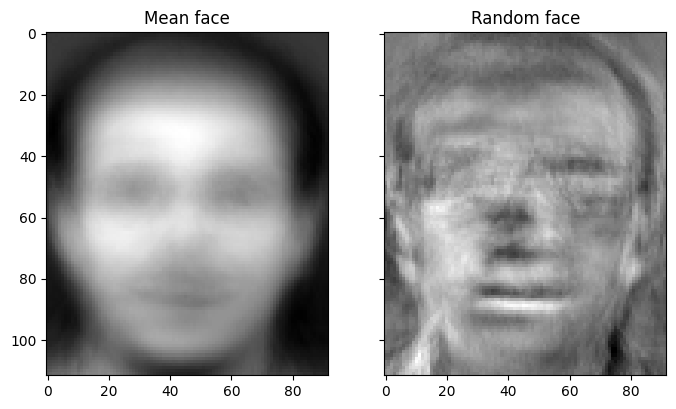

In [94]:
# Visualize the mean face and random face
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(pca.mean_.reshape(faceshape), cmap="gray")
axes[0].set_title("Mean face")
random_weights = np.random.randn(n_components) * weights.std()
newface = random_weights @ eigenfaces + pca.mean_
axes[1].imshow(newface.reshape(faceshape), cmap="gray")
axes[1].set_title("Random face")
plt.show()